In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

In [ ]:
def objective(t_0):
    ### Initial information, get dimensions
    q = 10 / np.sin(45 * np.pi / 180)
    total_time = 13.4738
    marsh_time = q / 9 + q / 8 + q / 7 + q / 6 + q / 5  # days
    easy_time = total_time - marsh_time
    easy_distance = 10 * easy_time
    s0 = easy_distance / 2

    t_0 *= np.pi / 180

    # t_0 = 60 * np.pi / 180
    x = s0 / np.sqrt(2)
    y = x * np.tan(t_0)
    total_time = np.sqrt(x**2 + y**2) / 10  # time in days
    yf = 100 / np.sqrt(2)

    t_i = t_0
    v = [10, 9, 8, 7, 6, 5]
    s = 10
    for i in range(len(v)):
        t_e = np.asin(np.sin(t_i) / (v[i] / v[i + 1]))
        t = s * np.sin(t_e)
        q = s * np.tan(t_e)
        total_time += t / v[i]
        x += s
        y += q
        t_i = t_e
        if i == len(v) - 2:
            break

    remaining_y = yf - y
    remaining_x = s0 / np.sqrt(2)
    remaining_distance = np.sqrt(remaining_x**2 + remaining_y**2)
    total_time += remaining_distance / v[-1]  # final time in days

    return total_time

In [ ]:
result = minimize_scalar(objective, method="golden", tol=1e-17)

In [20]:
result

 message: 
          Maximum number of iterations exceeded
 success: False
     fun: 8.624119894943192
       x: 65.13645657054012
     nit: 5000
    nfev: 5006

In [23]:
objective(result.x)

np.float64(8.624119894943192)

In [29]:
T_0 = np.linspace(62.5, 67.5, 21)
time = []
q = 10 / np.sin(45 * np.pi / 180)
total_time = 13.4738
marsh_time = q / 9 + q / 8 + q / 7 + q / 6 + q / 5  # days
easy_time = total_time - marsh_time
easy_distance = 10 * easy_time
s0 = easy_distance / 2
for t_0 in T_0:
    t_0 *= np.pi / 180
    X = [0]
    Y = [0]

    # t_0 = 60 * np.pi / 180
    x = s0 / np.sqrt(2)
    y = x * np.tan(t_0)
    X.append(x)
    Y.append(y)
    total_time = np.sqrt(x**2 + y**2) / 10  # time in days
    yf = 100 / np.sqrt(2)

    t_i = t_0
    v = [10, 9, 8, 7, 6, 5]
    s = 10
    for i in range(len(v)):
        t_e = np.asin(np.sin(t_i) / (v[i] / v[i + 1]))
        t = s * np.sin(t_e)
        q = s * np.tan(t_e)
        total_time += t / v[i]
        x += s
        y += q
        X.append(x)
        Y.append(y)
        t_i = t_e
        if i == len(v) - 2:
            break

    remaining_y = yf - y
    remaining_x = s0 / np.sqrt(2)
    remaining_distance = np.sqrt(remaining_x**2 + remaining_y**2)
    X.append(x + remaining_x)
    Y.append(y + remaining_y)
    total_time += remaining_distance / v[-1]  # final time in days
    time.append(total_time)
    # print(f"Total time: {total_time:.10f} days")
    # print(f"Final position: ({x:.2f}, {yf:.2f})")

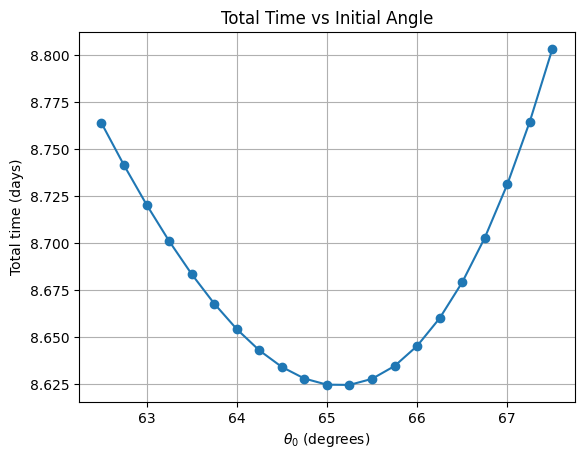

In [30]:
fig, ax = plt.subplots()
ax.plot(T_0, time, marker="o")
ax.set_xlabel(r"$\theta_0$ (degrees)")
ax.set_ylabel("Total time (days)")
ax.set_title("Total Time vs Initial Angle")
ax.grid()

Text(0.5, 0, 'X Coordinate (km)')

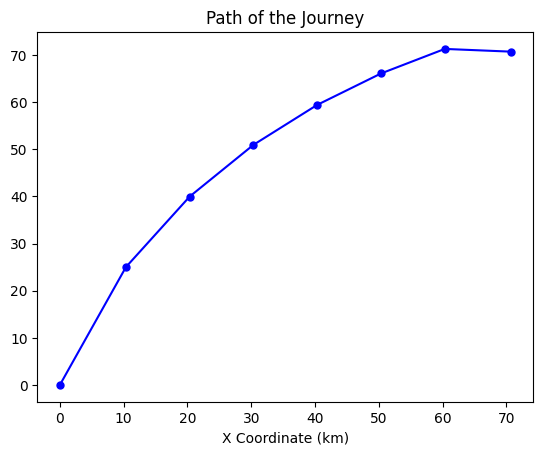

In [31]:
fig, ax = plt.subplots()
ax.plot(X, Y, marker="o", markersize=5, color="blue", label="Path")
ax.set_title("Path of the Journey")
ax.set_xlabel("X Coordinate (km)")